# 什么是机器学习

机器学习是一门能够让编程计算机从数据中学习的计算机科学和艺术<br>
工程化定义：<br>
一个计算机程序在完成任务T之后，获得经验E，其表现效果为P，如果任务T的性能表现，也就是用以衡量的P，随着E的增加而增加，可以称之为学习<br>
考虑：垃圾邮件过滤器的🌰

# 为什么要使用机器学习

* 通过机器学习算法可以简化那些现有解决方案需要大量手动调整或者规则列表超长的问题的代码，并且提升执行表现 
    1. 比如用传统编程技术编写垃圾邮件过滤器
* 解决传统技术手段根本无法解决的复杂问题
    1. 语音识别问题
* 在环境波动中适应新的数据
    1. 新写法的垃圾邮件
* 从复杂问题和海量数据中获得洞见
    1. 通过研究训练效果优秀的学习算法的数据，了解人类没有发现的数据中的关联性或新趋势

# 机器学习系统的种类

### 监督式/无监督式学习

标准：是否在人的监督下训练<br>
#### 监督学习
##### 比如：
分类任务：<br>
垃圾邮件过滤<br>
回归：<br>
汽车价格预测<br>
房价预测<br>
##### 重要的监督学习的算法：
K-近邻算法(KNN)<br>
线性回归(LR)<br>
逻辑回归(LR)<br>
支持向量机(SVM)<br>
决策树和随机森林(DT RF)<br>
一部分神经网络(NN)<br>

#### 无监督学习 （异常检测：比如信用卡欺诈，又或者从数据集中移除异常值）
##### 聚类算法 （比如，检测相似访客的分组）
k-平均算法(K-means)<br>
分层聚类分析(HCA)<br>
最大期望算法(EM)<br>
##### 可视化和降维   (可视化，便于人理解数据怎么组织)（降维，用来做特征提取，减小数据所占空间，提高速度，有可能提高性能）
主成分分析(PCA)<br>
核主成分分析(Kernel PCA)<br>
局部线性嵌入(LLE)<br>
t-分布随机近嵌入(t-SNE)<br>
##### 关联规则学习 （发现数据属性间的联系：比如超市的商品）
Apriori<br>
Eclat<br>

#### 半监督学习
大量未标记数据和少量已标记数据<br>
大多数半监督算法采用无监督和监督算法的结合：<br>
深度信念网络(DBN):基于一种互相堆叠的无监督式组件（受限玻尔兹曼机），然后用监督式学习进行微调

#### 强化学习
学习系统，又称为智能体，能够观察环境，做出选择，执行操作，并获得回报，或者以负面回报的形式获得惩罚<br>
比如：Alphago

### 批量学习和在线学习

标准：看系统是否可以从传入的数据流进行增量学习<br>
#### 批量学习
必须使用所有的可用数据进行训练，故一般采用离线学习的方式，即先训练系统，然后将其投入生产环境，这时候学习过程停止，只是将所学到的应用出来。<br>
只是每次更新数据的时候，重新训练的成本较大
#### 在线学习
又称为增量学习，持续接收数据流，并同时对数据流的变化做出快速或自主的反应，可以解决超大数据集的的训练问题<br>
需要指出的是，整个训练通常也是离线完成的，“在线学习”具有歧义性，称为增量学习更合适

### 基于实例学习与基于模型的学习

是将新的数据和已知数据进行匹配，还是对训练数据进行模式检测，进而建立预测模型

根据如何泛化来分类
#### 基于实例的学习
将所有的训练数据全部记住，然后根据某种相似度度量方式将其泛化到新的实例
#### 基于模型的学习
构建符合训练数据特征的模型，然后根据模型来预测<br>
比如：<br>
任务：根据人均GDP预测人民生活满意度的例子<br>
模型选择：猜测数据符合线性函数<br>
度量模型的性能表现：定义效用函数(模型有多好)或者成本函数(模型有多差)<br>

In [1]:
# 样例：根据人均GDP预测人民生活满意度
# 线性模型
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
np.random.seed(42)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# 加载数据
oecd_bli = pd.read_csv("./datasets/lifesat/oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv("./datasets/lifesat/gdp_per_capita.csv",thousands=","
                            ,delimiter='\t',encoding='latin1',na_values='n/a')

In [4]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [5]:
gdp_per_capita[:5]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
#数据预处理
def prepare_country_stats(oecd_bli,gdp_per_capita):
    oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli=oecd_bli.pivot(index="Country",columns="Indicator",values="Value")
#     print(oecd_bli.dtypes)
    gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
#     print(gdp_per_capita.dtypes)
    full_country_stats=pd.merge(left=oecd_bli,right=gdp_per_capita,left_index=True,
                               right_index=True)
    full_country_stats.sort_values(by="GDP per capita",inplace=True)
#     print(full_country_stats.dtypes)
    remove_indices=[0,1,6,8,33,34,35]
    keep_indices=list(set(range(36))-set(remove_indices))
    return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]

In [7]:
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)

In [8]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [9]:
# 训练数据
x=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

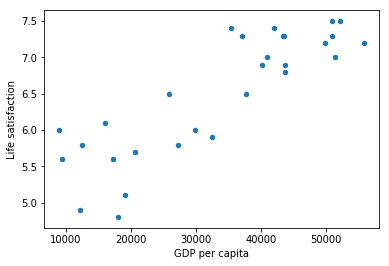

In [10]:
# 数据可视化
country_stats.plot(kind='scatter',x="GDP per capita",y="Life satisfaction")
plt.show()

In [11]:
# 定义线性模型，并训练和测试
lin_reg_model=LinearRegression()
lin_reg_model.fit(x,y)
x_new=[[22587]]
print(lin_reg_model.predict(x_new))

[[5.96242338]]


In [12]:
# 定义k近邻模型，并训练和测试
clf=KNeighborsRegressor(n_neighbors=3)
clf.fit(x,y)
x_new=[[22587]]
print(clf.predict(x_new))

[[5.76666667]]


# 机器学习的主要挑战

### 训练数据的数量不足

目前大部分机器学习算法都需要大量的数据才能正常工作（除非重用现有模型的某些部分）<br>
#### 数据的不合理有效性
2001年，微软有研究员表明，截然不同的机器学习算法（包括最简单的算法）在自然语言歧义消除这个复杂问题的表现上，几乎完全一致<br>
这些结果表明，和算法开发上，数据的建设也尤为重要

### 训练数据不具有代表性
就如之前的根据人均GDP预测人民生活满意度任务为例，如果有部分数据缺失，则会是模型的预测不准确

In [13]:
# 样例：根据人均GDP预测人民生活满意度
# 线性模型
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
%matplotlib inline
np.random.seed(42)

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

oecd_bli = pd.read_csv("./datasets/lifesat/oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv("./datasets/lifesat/gdp_per_capita.csv",thousands=","
                            ,delimiter='\t',encoding='latin1',na_values='n/a')

full_country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [14]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [15]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

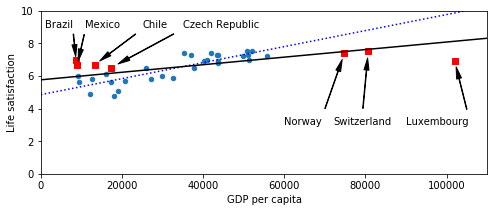

In [16]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# 缺数数据的预测
lin1 = LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

# 全部数据的预测
lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.show()

#### 采样偏差
采样偏差是使训练数据不具代表性的重要原因，一个著名的案例是1936年，兰登对决罗斯福<br>
其次，还有一种特殊类型的采用偏差，叫做无反应偏差

### 质量差的数据

如果训练数据满是错误、异常值和噪声，系统将更难检测到底层模式，更不太可能会表现良好
，所以很有必要花时间处理训练数据。
* 如果某些实例明显是异常情况，要么直接丢弃，要么手动修复错误
* 如果某些实例缺少部分特征，(例如，5%的顾客没有指定年龄),要么整体忽略这些特征，要么
忽略这部分有缺失的实例，又或者是将缺失的值补充完整(比如填写年龄值的中位数，或者训练
 一个带有这个特征的模型，再训练一个不带有这个特征的模型)

### 无关特征

正所谓：垃圾入，垃圾出。只有训练数据里面包含足够多的相关特征，和较少的无关特征，
系统才能够完成学习。一个成功的机器学习项目，关键部分是提取出一组好的用来训练的特征集，这个过程叫做特征工程，包括以下几点：
* 特征选择：选择最有用的特征进行训练
* 特征提取：将现有特征进行整合，产生更有用的特征(比如降维)
* 通过收集数据创造新特征

### 训练数据的过度拟合

还是以GDP预测幸福的🌰为例<br>
如果我们采用高阶多项式，固然可以获得在训练数据上表现好得多的模型，但显然，也是一点用都没有的。

c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\lib\nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
c:\users\sha\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


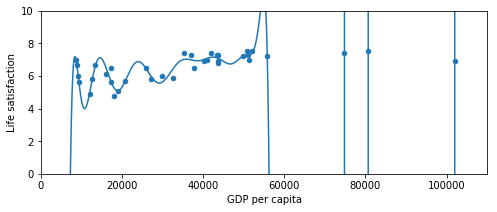

In [17]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

解决方案：
* 简化模型（例如：选择线性模型，而不是高阶多项式）
* 收集更多训练数据
* 减少训练数据中的噪声（例如：修复数据错误和消除异常值）
* 通过约束模型使其更加简单，降低过拟合的风险-----正则化，也就是将原来模型的自由度进行额外的限制，这个正则化参数不是模型训练优化出来的，而是人手动给定的，故又称为超参数

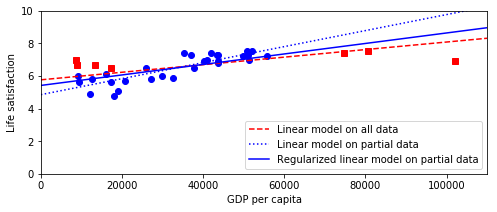

In [18]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
# 岭回归 也就是 l2正则，在最后的损失计算时 + w^2
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

### 训练数据的拟合不足

与过拟合相反，产生的原因是对于训练数据来说，模型太过于加单，比如用线性模型预测幸福度，就属于拟合不足，因为实际情况显然比这要复杂的多。<br>
解决方式：
* 选择更多参数，更强大的模型
* 给学习算法提供更好的特征集(特征工程)
* 减少模型中的约束(比如，减少正则化超参数)

### 退后一步

总结一下：
* 机器学习是关于如何让机器更好地处理某些特定任务的理论，它从数据中学习，而不是将规则进行清晰的编码。
* 机器学习有很多类型：监督式和无监督式，批量的和在线的，基于实例的和基于模型的，等等
* 在一个机器学习项目中，你从训练集中采集数据，然后将数据交给学习算法来计算，如果算法是基于模型的，它会调整一些参数来将模型适配于训练集(即对训练集本身做出很好的预测)，然后算法就可以对新的场景做出合理的预测。如果算法是基于实例的，它会记住这些样例，然后根据相似度来对新的实例进行泛化。
* 如果训练集的数据太少，训练代表性不够，包含太多噪声或者是被一些无关特征污染(垃圾进，垃圾出)，那么系统将无法很好的工作。最后，你的模型既不能太简单（这会导致拟合不足），也不能太复杂(这会导致过度拟合)。
<br>还有一个最后要讲的重要主题是：在训练好了一个模型之后，你不能只是“希望”它可以正确地对新的场景做出泛化。你还需要评估它，必要时做出一些调整。下面就来看看如何做到这一点

# 测试和验证

了解一个模型对于新场景的泛化能力的唯一办法就是，让模型真实的去处理新场景。
#### 测试集
<br>做法之一是将模型部署到新场景，然后监控它的输出。但这样如果模型效果不好，用户肯定会抱怨，所以这显然不是最好的办法。
<br>更好的选择是将数据分割成两部分：训练集和测试集。顾名思义，训练集用来训练模型，测试集用来测试模型，应对新场景的误差率称为泛化误差。通过测试集来评估模型，就可以得到对这个误差的评估。这个评估可以知道模型在处理新场景的能力如何。
<br>如果训练误差很低(模型对于训练集很少出错),但是泛化误差很高，那说明模型对于训练数据存在过度拟合。
<br>通常采用2/8定律，20%用于测试，80%用于训练
#### 交叉验证
<br>评估一个模型。可以采用测试集，那么对于多个模型呢？（比如线性模型和多项式模型）这时候，千万不要用测试集去验证，这样仍然会出现过拟合。正确的做法是交叉验证，通过将训练集分成若干个互补的子集，然后将多个模型，在这些子集的不同组合进行训练，再用剩下的子集进行验证，从而选定最好的模型，最后再用测试集来测量泛化误差

#### 没有免费的午餐的定理
模型是观察的简化，这个简化是丢弃了哪些数据不大可能泛化至新实例上的多余细节。但是要决定对丢弃哪些数据以及保留哪些数据，必须要做出假设。<br>
比如，线性模型基于的假设就是，数据基本上都是线性的，而实例与直线之间的距离都是噪声，可以安全的忽略它们。<br>
1996年，David Wolpert提到，如果没有对数据做出假设，就么没有理由更偏好于哪个模型，那么想要知道哪个模型最好的方式，就是对所有模型进行评估，但实际是不可能的，所以需要对数据做出一些合理的假设。比如，对于简单任务，只会评估几个具有不同正则化水平的线性模型，而对于复杂的问题，则会评估多个神经网络模型。

# 练习